In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data=pd.read_csv(r"E:\PYTHON\Intellipaat Dataset\Sport car price.csv")

In [3]:
data.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"


In [4]:
# from pandas_profiling import ProfileReport
# Report = ProfileReport(data)
# Report.to_file(output_file='sportcar.html')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Car Make                 1007 non-null   object
 1   Car Model                1007 non-null   object
 2   Year                     1007 non-null   int64 
 3   Engine Size (L)          997 non-null    object
 4   Horsepower               1007 non-null   object
 5   Torque (lb-ft)           1004 non-null   object
 6   0-60 MPH Time (seconds)  1007 non-null   object
 7   Price (in USD)           1007 non-null   object
dtypes: int64(1), object(7)
memory usage: 63.1+ KB


In [6]:
data.isnull().sum()

Car Make                    0
Car Model                   0
Year                        0
Engine Size (L)            10
Horsepower                  0
Torque (lb-ft)              3
0-60 MPH Time (seconds)     0
Price (in USD)              0
dtype: int64

In [7]:
data.dropna(inplace=True)

###### Clean the data and remove the null values from the dataset.( Note - For engine size replace the word starting with electric as 2 and hybrid with 4)

In [9]:
data["Engine Size (L)"].unique()

array(['3', '5.2', '3.9', '4', '4.4', '6.2', '3.8', '8', '5', '3.5',
       '4.7', '2', '2.9', '6', 'Electric', '6.5', '3.7', 'Electric Motor',
       '2.5', '1.5 + Electric', '6.8', '8.4', '6.6', '7', '1.7', '3.3',
       '-', '6.7', '1.8', 'Electric (tri-motor)', '5.5',
       'Electric (93 kWh)', 'Electric (100 kWh)', 'Hybrid (4.0)', '4.6',
       '3.6', '1.5', 'Hybrid', '5.7', '2.0 (Electric)', '4.0 (Hybrid)',
       '0', '6.4', '6.3', '2.3'], dtype=object)

In [10]:
data["Engine Size (L)"]=data["Engine Size (L)"].replace("Electric",2)
data["Engine Size (L)"]=data["Engine Size (L)"].replace("Electric Motor",2)
data["Engine Size (L)"]=data["Engine Size (L)"].replace("Electric (tri-motor)",2)
data["Engine Size (L)"]=data["Engine Size (L)"].replace("1.5 + Electric",2)
data["Engine Size (L)"]=data["Engine Size (L)"].replace("-",2)
data["Engine Size (L)"]=data["Engine Size (L)"].replace("Electric (93 kWh)",2)
data["Engine Size (L)"]=data["Engine Size (L)"].replace("Electric (100 kWh)",2)
data["Engine Size (L)"]=data["Engine Size (L)"].replace("Hybrid (4.0)",4)
data["Engine Size (L)"]=data["Engine Size (L)"].replace("4.0 (Hybrid)",4)
data["Engine Size (L)"]=data["Engine Size (L)"].replace("2.0 (Electric)",2)
data["Engine Size (L)"]=data["Engine Size (L)"].replace("Hybrid",4)

In [11]:
data['Engine Size (L)'].unique()

array(['3', '5.2', '3.9', '4', '4.4', '6.2', '3.8', '8', '5', '3.5',
       '4.7', '2', '2.9', '6', 2, '6.5', '3.7', '2.5', '6.8', '8.4',
       '6.6', '7', '1.7', '3.3', '6.7', '1.8', '5.5', 4, '4.6', '3.6',
       '1.5', '5.7', '0', '6.4', '6.3', '2.3'], dtype=object)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 995 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Car Make                 995 non-null    object
 1   Car Model                995 non-null    object
 2   Year                     995 non-null    int64 
 3   Engine Size (L)          995 non-null    object
 4   Horsepower               995 non-null    object
 5   Torque (lb-ft)           995 non-null    object
 6   0-60 MPH Time (seconds)  995 non-null    object
 7   Price (in USD)           995 non-null    object
dtypes: int64(1), object(7)
memory usage: 70.0+ KB


In [13]:
data['Horsepower'].unique()

array(['379', '630', '661', '562', '710', '617', '523', '490', '760',
       '600', '1500', '717', '296', '1280', '471', '416', '454', '300',
       '505', '320', '626', '671', '622', '720', '1914', '414', '759',
       '986', '591', '503', '650', '660', '350', '641', '611', '394',
       '612', '369', '603', '455', '460', '325', '349', '592', '444',
       '405', '797', '770', '332', '473', '480', '573', '380', '1600',
       '181', '620', '764', '624', '1000+', '382', '800', '715', '690',
       '730', '469', '365', '401', '645', '435', '500', '780', '750',
       '402', '575', '729', '789', '577', '495', '237', '310', '791',
       '1874', '542', '368', '616', '1020', '1479', '755', '1,000+',
       '288', '482', '1973', '1262', '1035', '819', '385', '647', '1200',
       '1578', '625', '583', '429', '563', '400', '707', '887', '305',
       '640', '255', '689', '372', '1000', '2000', '10,000', '1,500',
       '485', '1,020', '1872', '621', '1972', '1888'], dtype=object)

In [15]:
data['Horsepower']=data['Horsepower'].str.replace(",","", regex=True)
data['Horsepower']=data['Horsepower'].str.replace("+","", regex=True)

In [17]:
data["Torque (lb-ft)"].unique()

array(['331', '443', '561', '406', '568', '553', '494', '465', '625',
       '481', '516', '1180', '656', '295', '1015', '398', '317', '384',
       '280', '243', '664', '531', '468', '737', '738', '1696', '309',
       '590', '479', '650', '550', '276', '626', '369', '420', '627',
       '455', '505', '560', '457', '707', '270', '354', '476', '339',
       '1106', '151', '605', '368', '723', '642', '509', '604', '507',
       '513', '600', '440', '708', '774', '254', '663', '332', '530',
       '470', '258', '290', '413', '1732', '376', '1050', '-', '10,000+',
       '236', '472', '1254', '848', '1300', '442', '641', '498', '350',
       '944', '268', '184', '400', '263', '7,376', '1,180', '475',
       '1,050', '740', '538'], dtype=object)

In [20]:
data["Torque (lb-ft)"]=data["Torque (lb-ft)"].replace("-",np.nan, regex=True)
data["Torque (lb-ft)"]=data["Torque (lb-ft)"].str.replace(",","", regex=True)
data["Torque (lb-ft)"]=data["Torque (lb-ft)"].str.replace("+","", regex=True)

In [21]:
data["Price (in USD)"].unique()

array(['101,200', '274,390', '333,750', '142,700', '298,000', '130,000',
       '118,500', '59,900', '81,000', '212,000', '201,495', '3,000,000',
       '61,000', '70,100', '2,800,000', '92,950', '104,450', '150,000',
       '62,000', '78,000', '75,000', '225,000', '248,000', '155,000',
       '2,400,000', '100,200', '517,770', '625,000', '117,000', '72,800',
       '222,000', '64,695', '500,000', '45,690', '104,000', '218,000',
       '57,000', '210,000', '148,500', '132,000', '58,900', '518,000',
       '56,200', '192,500', '71,800', '68,000', '42,500', '39,000',
       '46,100', '142,100', '105,000', '87,200', '52,500', '241,000',
       '103,500', '146,000', '75,400', '42,900', '78,595', '62,750',
       '417,826', '150,980', '30,090', '88,700', '67,600', '274,280',
       '52,915', '218,009', '159,495', '142,086', '219,800', '74,290',
       '71,900', '134,300', '26,830', '213,195', '221,580', '100,550',
       '330,000', '200,000', '43,090', '1,700,000', '60,500', '522,000',
    

In [23]:
data["Price (in USD)"]=data["Price (in USD)"].str.replace(",","")

In [24]:
data["0-60 MPH Time (seconds)"].unique()

array(['4', '2.8', '3', '3.2', '2.7', '3.1', '3.8', '3.5', '2.5', '2.4',
       '5.4', '4.4', '4.8', '4.7', '3.6', '4.1', '1.85', '4.5', '3.3',
       '3.9', '4.2', '3.4', '5.1', '4.3', '2.9', '5', '5.3', '4.9', '6.5',
       '3.7', '1.95', '1.9', '2.6', '2.3', '4.6', '1.98', '< 1.9', '2.1',
       '5.2', '1.8', '2.2', '6.4', '2'], dtype=object)

In [26]:
data["0-60 MPH Time (seconds)"]=data["0-60 MPH Time (seconds)"].str.replace("<","")

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 995 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Car Make                 995 non-null    object
 1   Car Model                995 non-null    object
 2   Year                     995 non-null    int64 
 3   Engine Size (L)          995 non-null    object
 4   Horsepower               995 non-null    object
 5   Torque (lb-ft)           994 non-null    object
 6   0-60 MPH Time (seconds)  995 non-null    object
 7   Price (in USD)           995 non-null    object
dtypes: int64(1), object(7)
memory usage: 70.0+ KB


In [29]:
data.dropna(inplace=True)

In [30]:
data["Horsepower"]=data["Horsepower"].astype(int)
data["Price (in USD)"]=data["Price (in USD)"].astype(int)
data["0-60 MPH Time (seconds)"]= data["0-60 MPH Time (seconds)"].astype(float)
data["Engine Size (L)"]=data["Engine Size (L)"].astype(float)
data["Torque (lb-ft)"]=data["Torque (lb-ft)"].astype(int)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Car Make                 994 non-null    object 
 1   Car Model                994 non-null    object 
 2   Year                     994 non-null    int64  
 3   Engine Size (L)          994 non-null    float64
 4   Horsepower               994 non-null    int32  
 5   Torque (lb-ft)           994 non-null    int32  
 6   0-60 MPH Time (seconds)  994 non-null    float64
 7   Price (in USD)           994 non-null    int32  
dtypes: float64(2), int32(3), int64(1), object(2)
memory usage: 58.2+ KB


### 1) What is the price of the most expensive car and which brand makes it ?

In [33]:
data[data['Price (in USD)']==data['Price (in USD)'].max()]

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
541,Bugatti,Chiron Super Sport 300+,2022,8.0,1578,1180,2.3,5200000
823,Bugatti,Chiron Super Sport 300+,2021,8.0,1578,1180,2.4,5200000


<b>Bugatti 5200000 <b>

### 2) Which brand gives the lowest power output from the engine ?

In [34]:
data.query('Horsepower==Horsepower.min()')

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
92,Mazda,MX-5 Miata,2021,2.0,181,151,6.5,26830


<b> Mazda, 181 <b>

### 3) Is Horsepower dependent on Torque ?

In [36]:
data['Horsepower'].corr(data['Torque (lb-ft)'])

0.7233516135222018

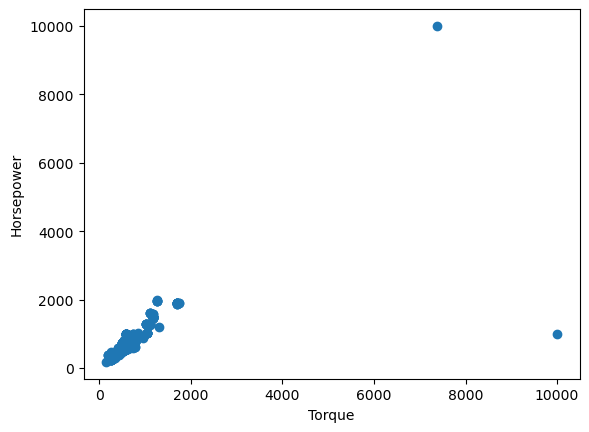

In [42]:
plt.scatter(data['Torque (lb-ft)'], data['Horsepower'])
plt.xlabel('Torque')
plt.ylabel('Horsepower')
plt.show()

<b> There is a strong relationship between horsepower and Torque </b>

### 4) Is the mean price of sports cars that take time to accelerate from 2 to 4 seconds is same as that for those cars that accelerate for 4 to 6 seconds?

In [49]:
car1 = data[(data['0-60 MPH Time (seconds)'] >= 2) & (data['0-60 MPH Time (seconds)'] < 4)]
car2 = data[(data['0-60 MPH Time (seconds)'] >= 4) & (data['0-60 MPH Time (seconds)'] < 6)]
print(f" 2to4 = {np.mean(car1['Price (in USD)'])}")
print(f" 2to6 = {np.mean(car2['Price (in USD)'])}")

 2to4 = 449372.8269503546
 2to6 = 88101.91570881226


<b> The average price of sports cars with acceleration between 2 to 6 seconds is twice as high as the average price of cars with acceleration between 2 to 4 seconds </b><br>
we can use ttest here

In [50]:
from scipy.stats import ttest_ind
t_stats,p_value=ttest_ind(car1['Price (in USD)'],car2['Price (in USD)'],equal_var=False)
print(t_stats,p_value)

11.853495722170495 8.26430400272364e-30


##### here p_value is very small(8.26430400272364e-30)we can reject the null hypothesis, there difference in mean prices between the two groups.

### 5) Given that the standard deviation of the populations is known. Perform the best suitable test for the previous problem statement.

In [53]:
import random
from statsmodels.stats.weightstats import ztest
car1=data[(data["0-60 MPH Time (seconds)"]>=2) & (data["0-60 MPH Time (seconds)"]<=4)]
car2=data[(data["0-60 MPH Time (seconds)"]>=4) & (data["0-60 MPH Time (seconds)"]<=6)]
car1=car1["Price (in USD)"].to_list()
car2=car2["Price (in USD)"].to_list()
a=random.sample(car1,100)
b=random.sample(car2,100)
z_test,p_value=ztest(car1,car2)
p_value

2.4538308960378242e-12

<b> p_value is very small therefore we can reject the null hypothesis difference in the mean prices of sports cars that accelerate from 0 to 60 mph in 2 to 4 seconds and those that accelerate from 0 to 60 mph in 4 to 6 seconds </b>